# **Pràctica 1: Regressió**

# Apartat (C): Analitzant les dades

L'objectiu d'aquest primer apartat és conèixer la base de dades amb la que treballarem. Anaitzarem els diferents atributs que la composen, els entendrem i, si no està estipulat, fixarrem quin es l'atribut objectiu a predir de tots els que hi ha a la base de dades.

In [1]:
# importem alguens llibreries que necessitarem.
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import sklearn.feature_selection as fs
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
import warnings
warnings.filterwarnings("ignore")

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Carreguem els nostres datasets
days_dataset = pd.read_csv('day.csv', header=0)
days = days_dataset.values # data abans
hours_dataset = pd.read_csv('hour.csv', header=0)
hours = hours_dataset.values

Observem les primeres mostres de la nostra base de dades:

In [6]:
print('5 primeres mostres de days_dataset:')
days_dataset.head()

5 primeres mostres de days_dataset:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344,0.364,0.806,0.160,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363,0.354,0.696,0.249,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196,0.189,0.437,0.248,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200,0.212,0.590,0.160,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.227,0.229,0.437,0.187,82,1518,1600


In [7]:
print('5 primeres mostres de hours_dataset:')
hours_dataset.head()

5 primeres mostres de hours_dataset:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.240,0.288,0.810,0.000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.220,0.273,0.800,0.000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.220,0.273,0.800,0.000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.240,0.288,0.750,0.000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.240,0.288,0.750,0.000,0,1,1


Podríem ja suposar que el nombre d'usuaris registrats no varia gaire ni amb el temps ni amb el mes de l'any, però si amb els dies laborables i festius. En canvi els usuaris casuals, probablement siguin turistes o habitants que utilitzen les bicicletes per passejar, no per anar a treballar, llavors un bon clima i si és un dia de festa afectarà positivament a aquests usuaris.

Si suposem certes les assumpcions anteriors, llavors les hores on tindrem més usuaris entre setmana seran les d'abans d'anar a treballar (de 7 a 9) i les de la sortida de la feina, tot i que aquestes estan més distribuides, podria començar a les 16 i acabar a les 20. Per altra banda, els caps de setmana trobarem usuaris esporàdics que no creiem que iniciin la passejada abans de les 10 ni que s'estiguin fins més de les 18, així que no esperem un pic clar a cap hora d'un festiu.

Ara veurem estadístiques dels atributs numèrics de les bases de dades:

In [8]:
print("Estadístiques dels atributs numèrics de days_dataset:")
days_dataset.describe() 

Estadístiques dels atributs numèrics de days_dataset:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000
mean,366.000,2.497,0.501,6.520,0.029,2.997,0.684,1.395,0.495,0.474,0.628,0.190,848.176,3656.172,4504.349
std,211.166,1.111,0.500,3.452,0.167,2.005,0.465,0.545,0.183,0.163,0.142,0.077,686.622,1560.256,1937.211
min,1.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.059,0.079,0.000,0.022,2.000,20.000,22.000
25%,183.500,2.000,0.000,4.000,0.000,1.000,0.000,1.000,0.337,0.338,0.520,0.135,315.500,2497.000,3152.000
50%,366.000,3.000,1.000,7.000,0.000,3.000,1.000,1.000,0.498,0.487,0.627,0.181,713.000,3662.000,4548.000
75%,548.500,3.000,1.000,10.000,0.000,5.000,1.000,2.000,0.655,0.609,0.730,0.233,1096.000,4776.500,5956.000
max,731.000,4.000,1.000,12.000,1.000,6.000,1.000,3.000,0.862,0.841,0.973,0.507,3410.000,6946.000,8714.000


In [9]:
print("Estadístiques dels atributs numèrics de hours_dataset:")
hours_dataset.describe()

Estadístiques dels atributs numèrics de hours_dataset:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000
mean,8690.000,2.502,0.503,6.538,11.547,0.029,3.004,0.683,1.425,0.497,0.476,0.627,0.190,35.676,153.787,189.463
std,5017.029,1.107,0.500,3.439,6.914,0.167,2.006,0.465,0.639,0.193,0.172,0.193,0.122,49.305,151.357,181.388
min,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.020,0.000,0.000,0.000,0.000,0.000,1.000
25%,4345.500,2.000,0.000,4.000,6.000,0.000,1.000,0.000,1.000,0.340,0.333,0.480,0.104,4.000,34.000,40.000
50%,8690.000,3.000,1.000,7.000,12.000,0.000,3.000,1.000,1.000,0.500,0.485,0.630,0.194,17.000,115.000,142.000
75%,13034.500,3.000,1.000,10.000,18.000,0.000,5.000,1.000,2.000,0.660,0.621,0.780,0.254,48.000,220.000,281.000
max,17379.000,4.000,1.000,12.000,23.000,1.000,6.000,1.000,4.000,1.000,1.000,1.000,0.851,367.000,886.000,977.000


Cap atribut té un mínim inferior a 0, això està molt bé ja que en ocasions podria trencar el model.

Algunes bases de dades tenen valors no existents. Numpy els representa amb ``np.nan``. Per treure'ls es pot utilitzar ``dades[np.isnan(dades)] = valor``. El ``valor`` d'aquest pot ser 0, la mitja, la mediana, ... i es pot mirar com afecten diferents estratègies. A més, també podem mirar si hi ha algun atribut perdut, és a dir, que té molts valors no existents i valorar si eliminar directament l'atribut.

Primer de tot comptarem el nombre de valors no existents per atribut:

In [3]:
print('Valors no existents days.csv:')
print(days_dataset.isnull().sum(),'\n')

Valors no existents days.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 



In [5]:
print('Valors no existents hours.csv:')
print(hours_dataset.isnull().sum())

Valors no existents hours.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Sembla que en el nostre dataset no trobem cap valor no existent, per tant no hem de fer res.

#### **Estudi i neteja d'atributs no utilitzats**
Creiem que pot ser interessant predir 'cnt', el nombre total de bicicletes llogades, a partir de la resta, però volem fer-ho considerant la demanda d'un únic usuari. Així que suposarem que sempre que un client vulgui llogar una bicicleta, n'hi hagi com a mínim una disponible, per tant no considerarem que ``casual`` o ``registered``. 

Per no tenir problemes amb el tipus de les dades, farem servir ``instant`` en comptes de ``dteday`` per representar el pas dels dies en ``days_dataset``. 

In [24]:
# data days
x_days = days[:, :13] 
x_days = np.delete(x_days,1,1)
x_days = x_days.astype(np.float)

# data hours
x_hours = hours[:, :14] 
x_hours = np.delete(x_hours,1,1)
x_hours = x_hours.astype(np.float)

# target days
y_days = days[:,15] # cnt
y_days = y_days.astype(np.float)

# target hours
y_hours = hours[:,16] # cnt
y_hours = y_hours.astype(np.float)

Del dataset de les hores creiem que el que és important és observar a quines hores hi ha els pics de bicis llogades.

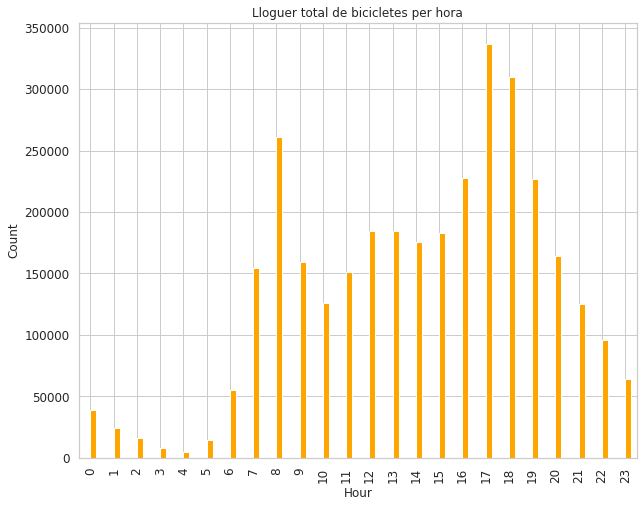

In [23]:
df_hours = pd.DataFrame(hours_dataset)
ax = df_hours[['hr','cnt']].groupby(['hr']).sum().reset_index().plot(kind='bar', figsize=(10, 8),
        legend = False, title ="Lloguer total de bicicletes per hora", 
        color='orange', fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

plt.show()

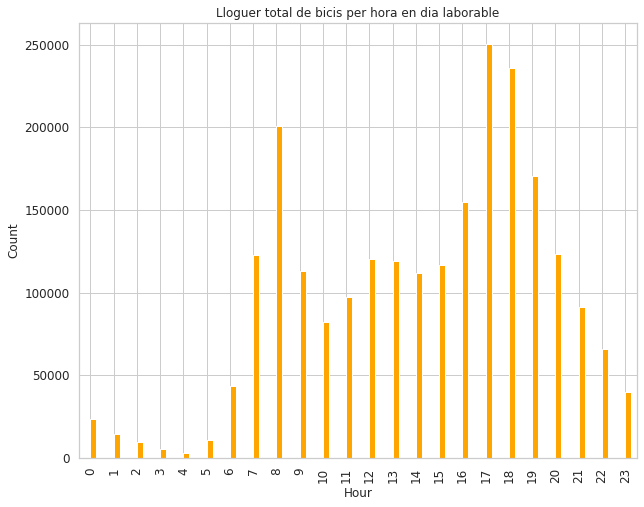

In [20]:
df_hours_workday = df_hours[df_hours['weekday'] < 5]
ax = df_hours_workday[['hr','cnt']].groupby(['hr']).sum().reset_index().plot(kind='bar', figsize=(10, 8),
        legend = False, title ="Lloguer total de bicis per hora en dia laborable", 
        color='orange', fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

plt.show()

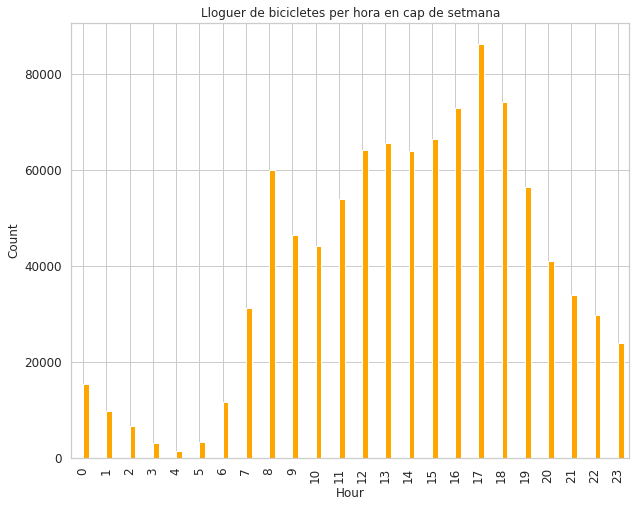

In [21]:
df_hours_weekend = df_hours[df_hours['weekday'] > 4]
ax = df_hours_weekend[['hr','cnt']].groupby(['hr']).sum().reset_index().plot(kind='bar', figsize=(10, 8),
        legend = False, title ="Lloguer de bicicletes per hora en cap de setmana", 
        color='orange', fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

plt.show()

La diferència més notable entre els dies laborables i els festius no és pas la distribució, si no la quantitat. El pic en dia laborable és força més alt que el del dia festiu, fins i tot si tenim en compte que de dies festius només n'hi ha dos i de laborables 5 ($250000 \times \frac{7}{5}$ és força més gran que $85000 \times \frac{7}{2}$). Les suposicions que havíem formulat es compleixen parcialment: els pics de les 8 i 17 els havíem predit, però pensàvem que seria més alt el de les 8. Potser al matí agafen transport públic per arribar ràpidament a la feina però a la tarda es prenen amb calma la tornada a casa. 

És clar que els usuaris les utilitzen per anar a treballar quan trobem pics a les 8 i 17, així que sorprèn que els caps de setmana es mantingui aquest patró. Ara bé, com que les diferències entre els pics i les valls no son tan exagerades com els dies laborables, podem intuir que el gruix dels usuaris les utilitzen per passejar. 

Veurem ara en quines temporades i condicions meteorològiques tenen més lloguers:

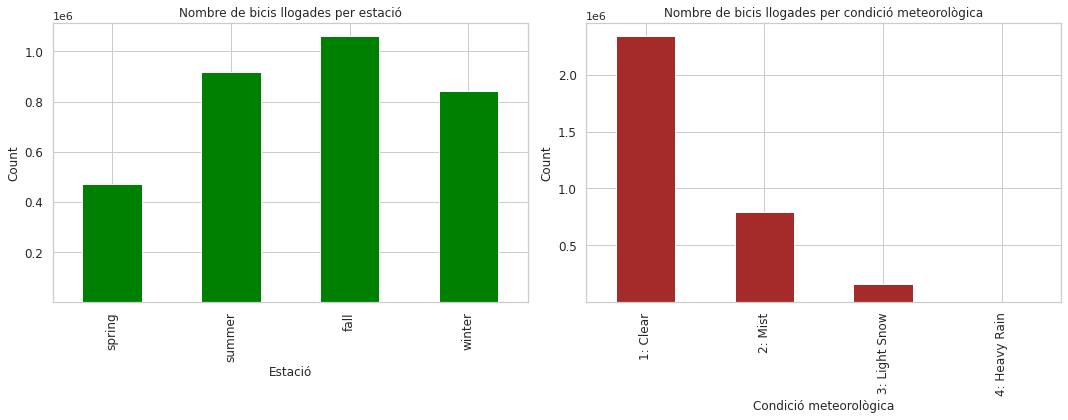

In [13]:
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax1 = df_hours[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
        legend = False, title ="Nombre de bicis llogades per estació", 
        stacked=True, color = 'green', fontsize=12, ax=ax1)
ax1.set_xlabel("Estació", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['spring','summer','fall','winter'])

 
ax2 = df_hours[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',  
        legend = False, stacked=True, title ="Nombre de bicis llogades per condició meteorològica", 
        color = 'brown', fontsize=12, ax=ax2)
ax2.set_xlabel("Condició meteorològica", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])

f.tight_layout()

Aquests gràfics mostren que la tardor és la estacio on més gent lloga bicicletes, i que la condició meteorològica preferida per llogar és un temps clar.

És curiós que la primavera tingui una distribució tan baixa en comparació amb les altres estacions, però això pot ser degut a que a la primavera a Washington és quan plou més dies (tot i que no és l'estació amb més volum de precipitcions) tal com es pot veure a https://en.wikipedia.org/wiki/Washington,_D.C.#Climate

#### Visualitzacions de les relacions entre atributs
A partir d'ara utilitzarem ``days_dataset`` ja que el lloguer hora per hora és molt variable, en canvi esperem que dia a dia aquestes diferències no es notin tant i poder fer un estudi en profunditat que arribi a un bon resultat.

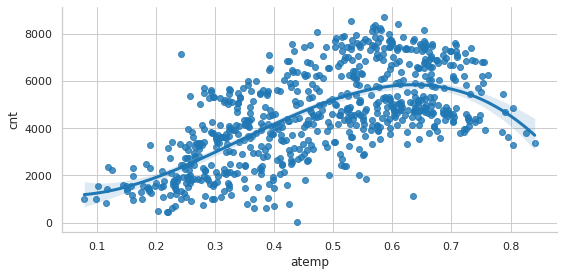

In [14]:
#Visualization of the relations between atemp and cnt

sns.lmplot("atemp", "cnt", days_dataset, order = 3, size = 4, aspect = 2)
plt.show()

Observem que quan la sensació tèrmica augmenta, el número de bicis llogades va augmentant fins a cert punt on comença a disminuir. Podem deduir que amb temperatures baixes o molt elevades tindrem menys bicis llogades.

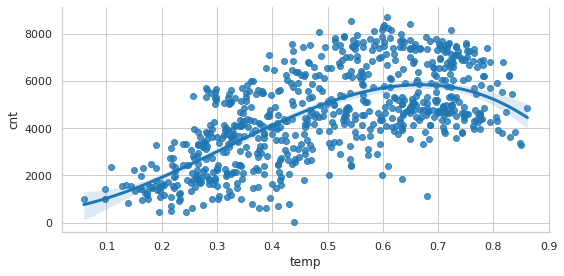

In [15]:
#Visualization of the relations between temp and cnt

sns.lmplot("temp", "cnt", days_dataset, order = 3, height = 4, aspect = 2)
plt.show()

Es molt semblant a la de la sensacío tèrmica ja que la temperatura i aquesta estan relacionades.
Si creesim un model per aquests podríem esperar trobar-nos una recta amb pendent positiu.
També esperem per tant una correlació positiva i alta. Comprovem-ho.

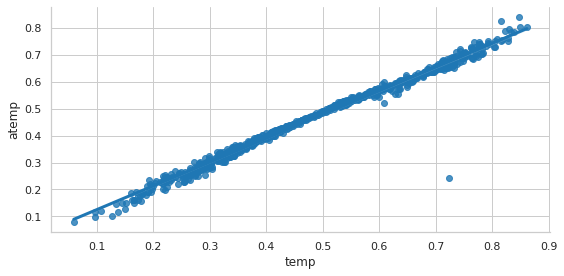

In [16]:
sns.lmplot("temp", "atemp", days_dataset, height = 4, aspect = 2)
plt.show()

Ara visualitzarem 'instant' a days_dataset.

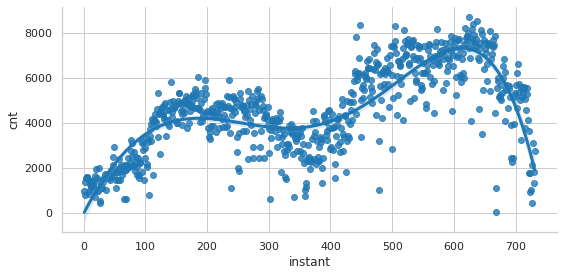

In [17]:
#Visualization of the relations between dteday and cnt

sns.lmplot("instant", "cnt", days_dataset, order = 5, height = 4, aspect = 2)
plt.show()

Podem observar que hi ha certa repetició a partir de l'insant 360, això és degut a que acaba l'any i les condicions haurien de ser semblants a l'inici. Veiem que el segon cicle es troba una mica més amunt, això indica que l'empresa té més usuaris que l'any anterior, per tant van per bon camí.

El següent gràfic és un histograma de l'atribut 'cnt' per ``days_dataset``:

Skewness:  -0.04735278011900183
Kurtosis:  -0.8119223847191548


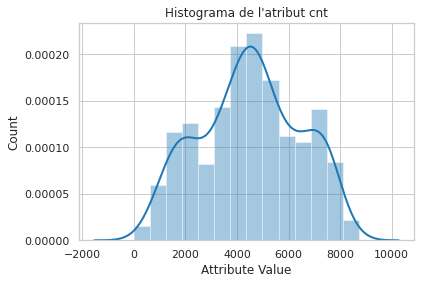

In [33]:
plt.figure()
plt.title("Histograma de l'atribut cnt")
plt.xlabel("Attribute Value")
plt.ylabel("Count")

#hist = plt.hist(y_days, bins=20, histtype="bar", rwidth=0.8)
sns.distplot(y_days);
print("Skewness: ", days_dataset['cnt'].skew())
print("Kurtosis: ", days_dataset['cnt'].kurt())

Sembla una distribució gaussiana.

Estudiem a continuació la correlació entre els diferents atributs per tal de saber si estan correlacionats entre ells.

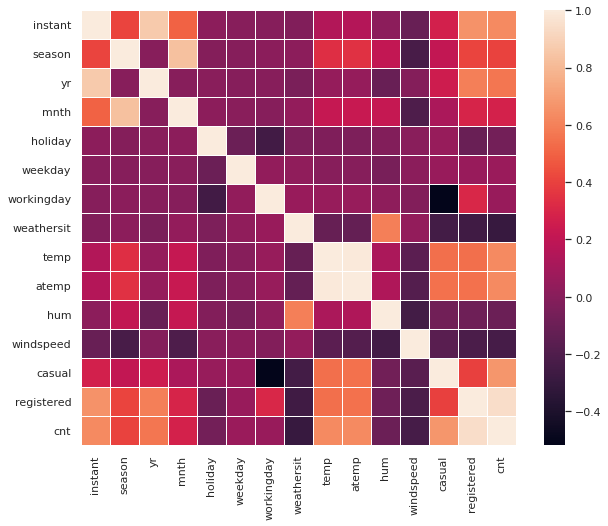

In [19]:
# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = days_dataset.corr()

plt.figure(figsize = (10,8))

ax = sns.heatmap(correlacio, square=True, linewidths=0.5)

Com hem suposat abans temp i atemp tenen una correlació molt alta, gairebé 1. Així que un dels dos el podríem eliminar, per exemple 'temp'.

Eliminant l'atribut ``yr`` i aplicant mòdul 366 a ``instant`` agrupem els dos anys de dades en un.

In [52]:
feature_names = days_dataset.keys()
indexes = [0, 2, 4, 5, 6, 7, 8, 10, 11, 12, 15]
df2 = pd.DataFrame(days[:,indexes], columns = feature_names[indexes])
df2['instant'] = df2['instant'] % 366

També podem utilitzar la funció pairplot per tal de veure els atributs que estan relacionats entre si.

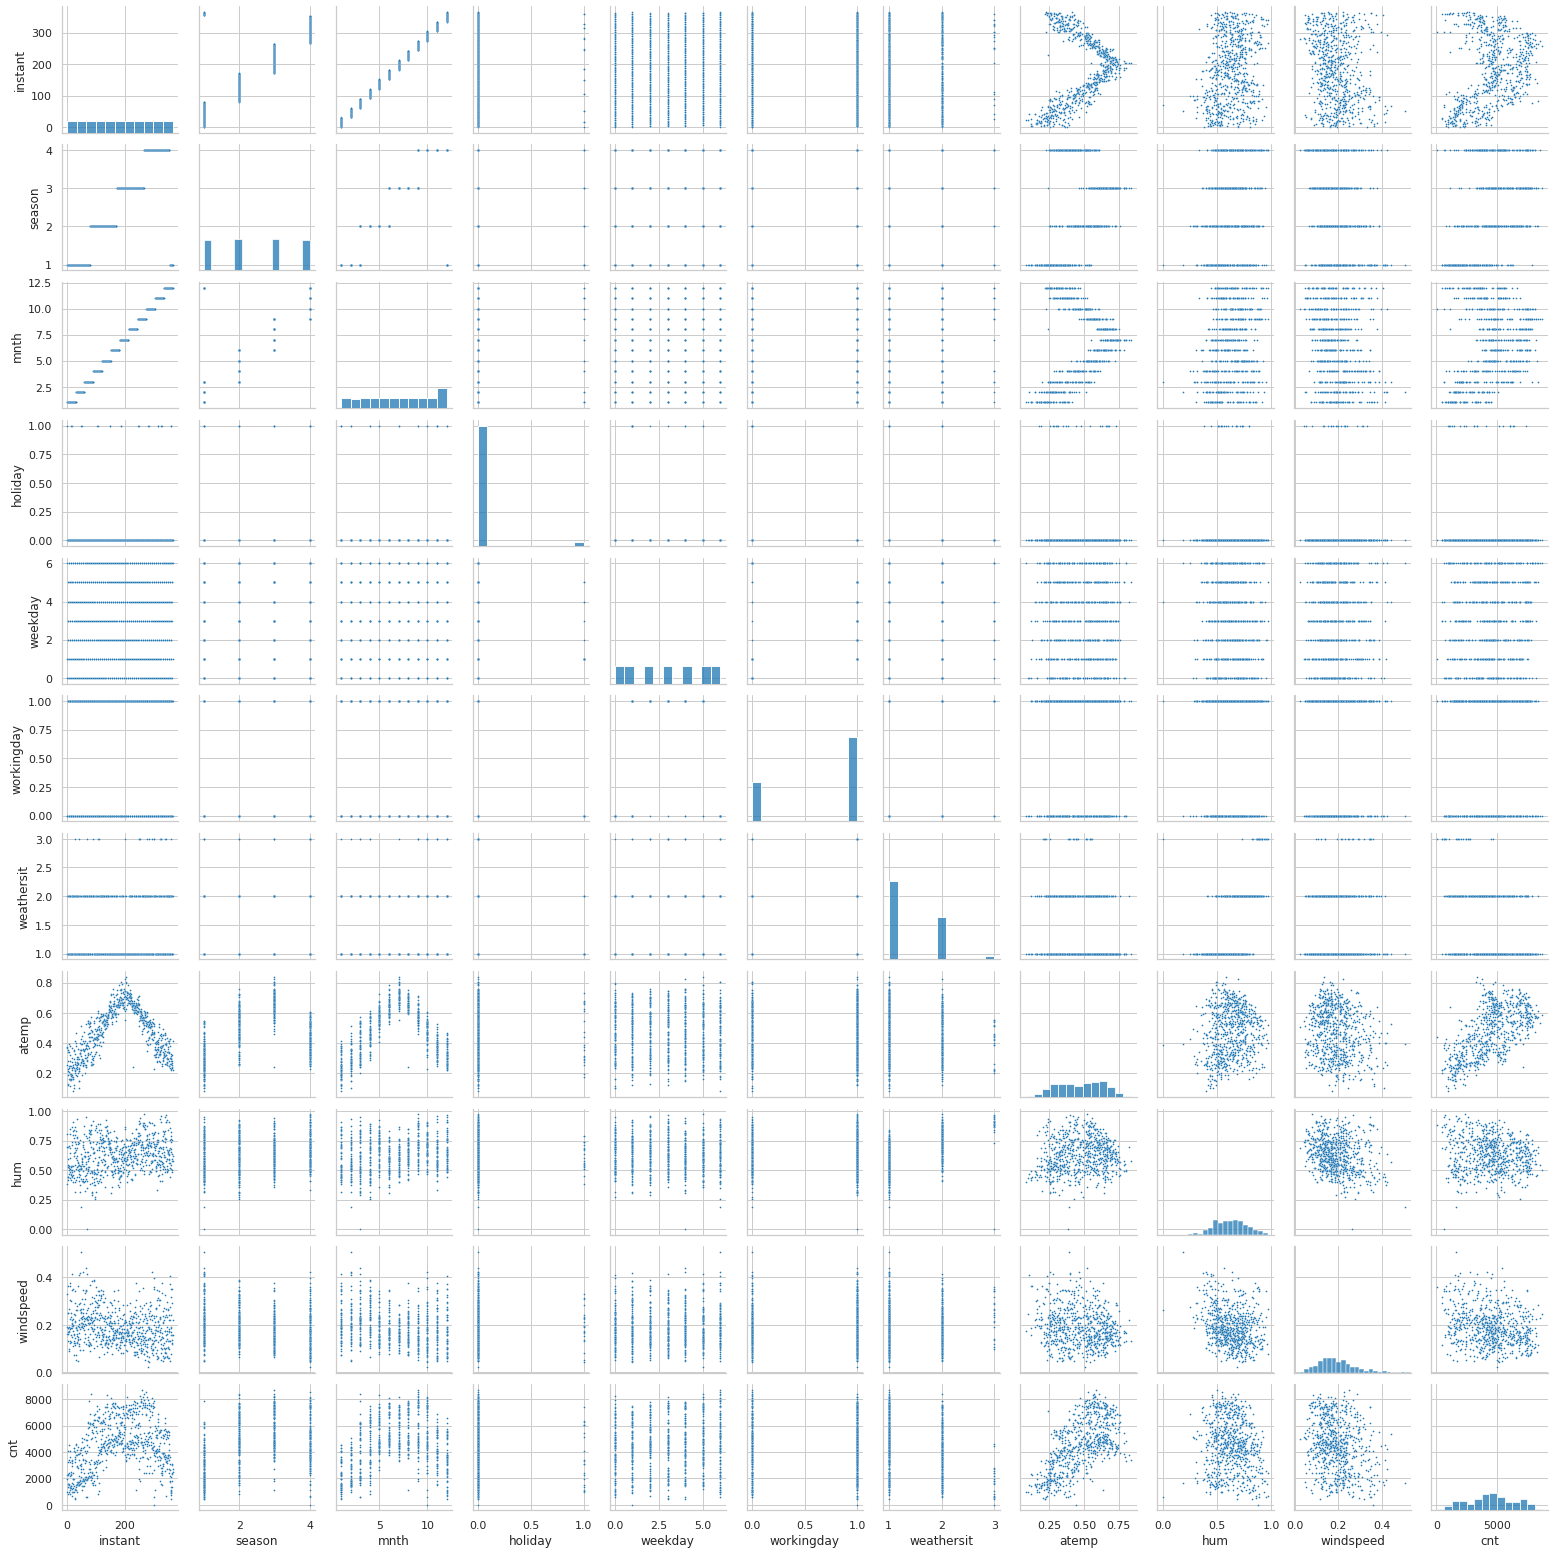

In [53]:
relacio = sns.pairplot(df2, height=2, aspect=1, plot_kws={"s": 3})

Es pot apreciar una certa relació entre ``instant`` i ``cnt``, també una mica amb ``atemp`` i fins i tot amb ``mnth`` i ``windspeed``. S'hauria de comprovar si ``weathersit`` i ``hum`` podrien ajudar al model o només estorbarien.

Així doncs ara podreu respondre a les següents preguntes:

**1. Quin és el tipus de cada atribut?**

**2. Quins atributs tenen una distribució Guassiana?**

Els atributs 'temp' i 'atemp' són els més propers a tenir una forma gaussiana.

**3. Quin és l'atribut objectiu? Per què?**

Com hem dit abans 'cnt' és l'atribut objectiu.

# Apartat (B): Primeres regressions

Per a aquest primer apartat es calcularà l'error quadràtic mitjà només del regressor per a cada un dels atributs de la base de dades, determinant aquell atribut pel qual l'error quadràtic mitjà (entre el valor predit i el real, per a cada mostra) és més baix. 

A continuació, es modificaran tots els atributs mitjançant **procediments de normalització (normal, estàndard)**, i s'avaluarà el rendiment del regressor après. Per a això, caldrà analitzar la mitja i variança de cada variable per totes les mostres, per identificar aquells valors que tenen una distribució normal, els preferits per fer regressió, i descartar altres atributs que no són representatius per fer la regressió, i que afegeixen soroll al model. 

Pel que fa a l'error resultant de la regressió, es pot calcular fent la diferència entre el valor predit i el real al quadrat: així doncs, si les dades tenen valors grans (tipus 10^3), l'error al quadrat podria acabar sent 10^6. Per això és important normalitzar abans (escalar les dades a un rang més petit).

Per estandarditzar les dades amb les funcions mean i std de numpy podem fer servir la següent funció:

In [22]:
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

Nem a definir les noves dades normalitzades:

In [23]:
days_t = np.c_[x_days, y_days]
days_t = standarize(days_t)

x_days_t = days_t[:,:12]
y_days_t = days_t[:,12]

In [24]:
"""d'aqui"""

"d'aqui"

Ara aprendrem un model regressor tenint en compte tots aquells atributs que tenen una millor distribució de valors i calcularem l'error assolit en la predicció.

Per a la regressió podeu utilitzar la llibreria sklearn:

In [25]:
def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

Per calcular el mse:

In [26]:
# es pot utilitzar numpy per a calcular el mse
def mse(v1, v2):
    return ((v1 - v2)**2).mean()

Ara que hem carregat les dades podem entrenar un regressor lineal per a aproximar la funció que les genera:

Mean squeared error:  0.6045724887544274
R2 score:  0.3954275112455726


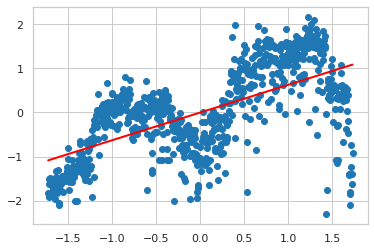

In [27]:
# Provem amb un únic atribut
atribut1 = x_days_t[:,0].reshape(x_days_t.shape[0], 1)

regr = regression(atribut1, y_days_t) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x_days_t[:,0], y_days_t)
plt.plot(atribut1, predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(y_days_t, predicted)
r2 = r2_score(y_days_t, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)


Sabent això ara podem avaluar de manera independent la idonietat de cadascun dels atributs.

Per a assegurar-nos que el model s'ajusta be a dades noves, no vistes, 
cal evaluar-lo en un conjunt de validacio (i un altre de test en situacions reals).
Com que en aquest cas no en tenim, el generarem separant les dades en 
un 80% d'entrenament i un 20% de validació.

In [29]:
# Dividim dades d'entrenament
x_train, x_test, y_train, y_test = train_test_split(x_days_t, y_days_t, test_size=0.2)

for i in range(x_train.shape[1]):
    x_tr = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_test[:,i] # seleccionem atribut i en conjunt de val.
    x_tr = np.reshape(x_tr,(x_tr.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))

    regr = regression(x_tr, y_train)    
    error = mse(y_test, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_test, regr.predict(x_v))

    print("Error en  %s: %f" %(feature_names[i], error))
    print("R2 score en %s: %f" %(feature_names[i], r2))

Error en  instant: 0.610639
R2 score en instant: 0.329656
Error en  dteday: 0.745712
R2 score en dteday: 0.181377
Error en  season: 0.695590
R2 score en season: 0.236399
Error en  yr: 0.852160
R2 score en yr: 0.064521
Error en  mnth: 0.918137
R2 score en mnth: -0.007907
Error en  holiday: 0.900200
R2 score en holiday: 0.011784
Error en  weekday: 0.904590
R2 score en weekday: 0.006965
Error en  workingday: 0.839093
R2 score en workingday: 0.078865
Error en  weathersit: 0.538915
R2 score en weathersit: 0.408393
Error en  temp: 0.521051
R2 score en temp: 0.428004
Error en  atemp: 0.918361
R2 score en atemp: -0.008153
Error en  hum: 0.918828
R2 score en hum: -0.008666


In [30]:
""" fins aqui no se si deixaro"""

' fins aqui no se si deixaro'

In [31]:
print(x_train.shape)

(584, 12)


Anem a crear el nostre regressor d'una altre manera:

In [32]:
# Dividim dades d'entrenament
print ('Training and testing set sizes', x_train.shape, x_test.shape)
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train) 
print ('\nCoefs (per dim) ', regr.coef_, ' and intercept: ', regr.intercept_)
# Best possible score is 1.0, lower values (even negatives!!) are worse.
print ('\nTraining Score:', regr.score(x_train, y_train) )
print ('Testing Score:', regr.score(x_test, y_test) )
print ('\nTraining MSE: ', np.mean((regr.predict(x_train) - y_train)**2))
print ('Testing MSE: ', np.mean((regr.predict(x_test) - y_test)**2))

Training and testing set sizes (584, 12) (147, 12)

Coefs (per dim)  [-0.96096004  0.27781989  1.37036622  0.41817602 -0.04828027  0.07179935
  0.04046672 -0.15191045  0.31631707  0.17390652 -0.08596483 -0.11922819]  and intercept:  -0.002143418940637352

Training Score: 0.8033286846745652
Testing Score: 0.7876175342124271

Training MSE:  0.20100675440854518
Testing MSE:  0.193466500306742


### sparse model

Fem el mateix amb un regressor Lasso per intentar si podem millorar el model.

In [33]:
# Create a Lasso regressor
regr_lasso = linear_model.Lasso(alpha=.3)
regr_lasso.fit(x_train, y_train) 
print ('Coeffs (per dim): ', regr_lasso.coef_, 'and intercept:', regr_lasso.intercept_)
#print (feature_names)
# Are the coeficients now sparse?
print ('\nTraining Score:', regr_lasso.score(x_train, y_train)) 
print ('Testing Score:', regr_lasso.score(x_test, y_test)) 
# Is the score almost the same? 0.999999999998
print ('\nTraining MSE: ', np.mean((regr_lasso.predict(x_train) - y_train)**2))
print ('Testing MSE: ', np.mean((regr_lasso.predict(x_test) - y_test)**2))

Coeffs (per dim):  [ 0.26541873  0.          0.04139633  0.         -0.          0.
  0.         -0.          0.08791815  0.20057508 -0.         -0.        ] and intercept: 0.004668514590711266

Training Score: 0.5469156395682754
Testing Score: 0.5393964550185708

Training MSE:  0.46307219033417585
Testing MSE:  0.41957962747059446


Sembla que no hem millorat amb el regressor Lasso. Anem a veure l'error que obtindriem si utilitzessim les dades sense noramlitzar:

## NACHO: AQUI LES DADES SON LES MATEIXES D'ABANS, ESTAN NORMALITZADES!!!

In [34]:
# Dividim dades d'entrenament

print ('Training and testing set sizes', x_train.shape, x_test.shape)
regr_no_t = linear_model.LinearRegression()
regr_no_t.fit(x_train, y_train) 
print ('\nCoefs (per dim) ', regr_no_t.coef_, ' and intercept: ', regr_no_t.intercept_)
# Best possible score is 1.0, lower values (even negatives!!) are worse.
print ('\nTraining Score:', regr_no_t.score(x_train, y_train) )
print ('Testing Score:', regr_no_t.score(x_test, y_test) )
print ('\nTraining MSE: ', np.mean((regr_no_t.predict(x_train) - y_train)**2))
print ('Testing MSE: ', np.mean((regr_no_t.predict(x_test) - y_test)**2))

Training and testing set sizes (584, 12) (147, 12)

Coefs (per dim)  [-0.96096004  0.27781989  1.37036622  0.41817602 -0.04828027  0.07179935
  0.04046672 -0.15191045  0.31631707  0.17390652 -0.08596483 -0.11922819]  and intercept:  -0.002143418940637352

Training Score: 0.8033286846745652
Testing Score: 0.7876175342124271

Training MSE:  0.20100675440854518
Testing MSE:  0.193466500306742


Observem que els errors són molt grans.

Anem a veure altra informacío que treiem:

In [35]:
print (x_days.shape)
print (y_days.shape)
df_feature_names = feature_names.delete([1,13,14,15])
print (list(df_feature_names))
print ("max, min and mean:", np.max(y_days), np.min(y_days), np.mean(y_days))

(731, 12)
(731,)
['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
max, min and mean: 8714.0 22.0 4504.3488372093025


Amb els coeficients obtinguts de la primera prova que hem fet, segons la importància dels atributs podem separar els que no utilitzariem i els més importants.

In [36]:
ind = np.argsort(np.abs(regr.coef_))
print ('Odre de les variables (de menys a més important segons el primer regressor):', list(df_feature_names[ind]))

Odre de les variables (de menys a més important segons el primer regressor): ['workingday', 'holiday', 'weekday', 'hum', 'windspeed', 'weathersit', 'atemp', 'season', 'temp', 'mnth', 'instant', 'yr']


In [37]:
ind = np.argsort(np.abs(regr_lasso.coef_))
print ('Odre de les variables (de menys a més important segons el regressor lasso):', list(df_feature_names[ind]))

Odre de les variables (de menys a més important segons el regressor lasso): ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'hum', 'windspeed', 'yr', 'temp', 'atemp', 'instant']


Podem seleccionar els atributs més importants amb sklearn:

In [38]:
selector = fs.SelectKBest(score_func = fs.f_regression, k = 7)
selector.fit_transform(x_train, y_train)
df_feature_names = df_feature_names[selector.get_support()]
print ('Atributs seleccionats (T/F):', selector.get_support(), '\nAtributs seleccionats  (Name):', list(df_feature_names)) # Show the selected features

Atributs seleccionats (T/F): [ True  True  True  True False False False  True  True  True False False] 
Atributs seleccionats  (Name): ['instant', 'season', 'yr', 'mnth', 'weathersit', 'temp', 'atemp']


Anem a comparar les prediccions utilitzant tots els atributs i utilitzant només els importants:

In [41]:
x_train_important_features = x_train[:, selector.get_support()]
x_test_important_features = x_test[:, selector.get_support()]
x_train_important_features.shape

(584, 7)

In [43]:
# Score using a single feature
regr_feat1 = linear_model.LinearRegression()
for i in np.arange(len(df_feature_names)):
    feat1 = x_train_important_features[:,i:i+1]
    regr_feat1.fit(feat1, y_train)    
    print ('Feature:', df_feature_names[i])
    print ('Score:', regr_feat1.score(feat1, y_train)) 

Feature: instant
Score: 0.409727136588828
Feature: season
Score: 0.16083691696131042
Feature: yr
Score: 0.3393093237608288
Feature: mnth
Score: 0.08099436705276553
Feature: weathersit
Score: 0.09011170673277702
Feature: temp
Score: 0.3900998971201769
Feature: atemp
Score: 0.39119033475613074


In [ ]:
# Visualization of target and predicted responses
clf = linear_model.LinearRegression()
clf.fit(x_train, y_train)
predicted = clf.predict(x_train)
plt.figure(figsize = (10,8))
plt.scatter(y_train, predicted, alpha = 0.3)
plt.plot([-2, 2], [-2, 2], '--k')
plt.axis('tight')
plt.xlabel('True count')
plt.ylabel('Predicted count')
plt.show()

In [ ]:
print("All features included")
print("Training score: ", clf.score(x_train, y_train))  # Best possible score is 1.0, lower values are worse.
print("Test score: ", clf.score(x_test, y_test))

In [ ]:
# Visualization of target and predicted responses
clf = linear_model.LinearRegression()
clf.fit(x_train_important_features, y_train)
predicted = clf.predict(x_train_important_features)
plt.figure(figsize = (10,8))
plt.scatter(y_train, predicted, alpha = 0.3)
plt.plot([-2, 2], [-2, 2], '--k')
plt.axis('tight')
plt.xlabel('True count')
plt.ylabel('Predicted count')
plt.show()

In [ ]:
print("Only important features included")
print("Training score: ", clf.score(x_train_important_features, y_train))  # Best possible score is 1.0, lower values are worse.
print("Test score: ", clf.score(x_test_important_features, y_test))

No és un model perfecte però tampoc dolent.

Provem ara amb un model polinomial

In [ ]:
score = 0
best_degree = 0
for degree in range(1, 10):
    x_t, y_t, x_val, y_val = split_data(x_train, y_train)
    
    poly = PolynomialFeatures(degree = degree)
    poly.fit_transform(x_t)
    
    model = Pipeline([('poly', PolynomialFeatures(degree = degree)),('linear', LinearRegression(fit_intercept=False))])
    regressor = model.fit(x_t, y_t)
    
    if regressor.score(x_val, y_val) > score:
        best_degree = degree
        score = regressor.score(x_val, y_val)

print(best_degree)
print(score)

In [ ]:
score = 0
best_degree_important_features = 0
for degree in range(1, 10):
    x_t, y_t, x_val, y_val = split_data(x_train_important_features, y_train)
    
    poly = PolynomialFeatures(degree = degree)
    poly.fit_transform(x_t)
    
    model = Pipeline([('poly', PolynomialFeatures(degree = degree)),('linear', LinearRegression(fit_intercept=False))])
    regressor = model.fit(x_t, y_t)
    
    if regressor.score(x_val, y_val) > score:
        best_degree = degree
        score = regressor.score(x_val, y_val)

print(best_degree_impottant_features)
print(score)

In [ ]:
degree = best_degree
poly = PolynomialFeatures(degree = degree)
poly.fit_transform(x_train)

model = Pipeline([('poly', PolynomialFeatures(degree = degree)),('linear', LinearRegression(fit_intercept=False))])
regressor = model.fit(x_train, y_train)

In [ ]:
predicted = regressor.predict(x_test)
plt.figure(figsize = (10,8))
plt.scatter(y_test, predicted, alpha = 0.3)
plt.plot([-2, 2], [-2, 2], '--k')
plt.xlabel('True count')
plt.ylabel('Predicted count')
plt.show()

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(range(len(predicted)), y_test, alpha = 0.3, color='y')
plt.scatter(range(len(predicted)), predicted, alpha = 0.3, color='m')
plt.axis('tight')
plt.xlabel('True count')
plt.ylabel('Predicted count')
plt.show()

In [ ]:
print(regressor.score(x_train, y_train))  # Best possible score is 1.0, lower values are worse.
print(regressor.score(x_test, y_test))

In [ ]:
degree = best_degree_important_features
poly = PolynomialFeatures(degree = degree)
poly.fit_transform(x_train_important_features)

model = Pipeline([('poly', PolynomialFeatures(degree = degree)),('linear', LinearRegression(fit_intercept=False))])
regressor = model.fit(x_train_important_features, y_train)

In [ ]:
predicted = regressor.predict(x_test_important_features)
plt.figure(figsize = (10,8))
plt.scatter(y_test, predicted, alpha = 0.3)
plt.plot([-2, 2], [-2, 2], '--k')
plt.xlabel('True count')
plt.ylabel('Predicted count')
plt.show()

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(range(len(predicted)), y_test, alpha = 0.3, color='y')
plt.scatter(range(len(predicted)), predicted, alpha = 0.3, color='m')
plt.axis('tight')
plt.xlabel('True count')
plt.ylabel('Predicted count')
plt.show()

In [ ]:
print(regressor.score(x_train_important_features, y_train))  # Best possible score is 1.0, lower values are worse.
print(regressor.score(x_test_important_features, y_test))

Quan es treballa en dades n-dimensionals (més d'un atribut), una opció és reduir la seva n-dimensionalitat aplicant un Principal Component Analysis (PCA) i quedar-se amb els primers 2 o 3 components, obtenint unes dades que (ara sí) poden ser visualitzables en el nou espai. Existeixen altres embeddings de baixa dimensionalitat on poder visualitzar les dades?

Així es podrà contestar a aquestes **preguntes**:

1. Quin són els atributs més importants per fer una bona predicció?

2. Amb quin atribut s'assoleix un MSE menor?

3. Quina correlació hi ha entre els atributs de la vostra base de dades?

4. Com influeix la normalització en la regressió?

5. Com millora la regressió quan es filtren aquells atributs de les mostres que no contenen informació?

6. Si s'aplica un PCA, a quants components es redueix l'espai? Per què?


# Apartat (A): El descens del gradient  

En aquest apartat, ens centrarem en implementar en python el procés de descent del gradient explicat a les classes de teoria, i comparar-lo amb els resultats obtinguts amb l'apartat (B). 

$$J(w) = \frac{1}{2m} \left[ \sum^m_{i=1}(f(x^{i}; w) - y^{i})^2 + \lambda\sum_{j=1}^{n}(w_{j}^2) \right]$$

$J$ retorna el `mse`. Per a trobar $w_j$, repetirem fins convergència:
$$w_0 = w_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot 1$$
$$w_j = w_j - \alpha \left[\frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot x_{j}^{i} - \frac{\lambda}{m}w_{j} \right]$$


ó:

$$w_{j} := w_{j} \left(1-\alpha \frac{\lambda}{m} \right) - \alpha\frac{\lambda}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot x_{j}^{i}$$

On si considerem un regressor lineal (el model és una recta), llavors $w_0$ i $w_1$ representen, respectivament, la $b$ i $a$ de la fòrmula de la recta: 

$$h_\theta(x^{(i)}) = ax + b$$

$\alpha$ és el learning rate, i $h_\theta(x^{(i)})$ és la funció que fa la regressió, és a dir, la funció que prediu el valor de $y^{(i)}$ donat un(s) atribut(s) concret(s) $x^{(i)}$.

Així, tenint calculat el model en l'últim punt del primer exercici, ja sabem quin resultat hauríeu d'obtenir. O no, perquè la nostra implementació podria ser millor! 

In [ ]:
# Definim la funció per fer la regressió amb el descent del gradient
def gradientDescent(x,y,theta,alpha,m,numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        cost = np.sum(loss ** 2) / (2 * m)
        gradient = np.dot(xTrans, loss) / m
        theta = theta - alpha * gradient
    return theta

In [ ]:
# Definim les variables que utilitzarem per la regressió
m, n = np.shape(x_days)
numIterations = 100000
alpha = 0.0005
theta = np.ones(n)
theta = gradientDescent(x_days_t,y_days_t,theta,alpha,m,numIterations)

Odre de les variables (de menys a més important) segons el **primer regressor**:

In [ ]:
ind = np.argsort(np.abs(regr.coef_))
print (list(df_feature_names[ind]))

Odre de les variables (de menys a més important) segons el **descens de gradient**:

In [ ]:
ind2 = np.argsort(np.abs(theta))
print (list(df_feature_names[ind2]))

Els atributs estan ordenats amb un pes similar excpete 'instant', en el primer regressor lineal que hem fet, és el segon atribut més important mentre que, en el regressor amb el descens del gradient, el menys important.

In [ ]:
# Creem figura 3d
from mpl_toolkits.mplot3d import axes3d, Axes3D
# generem dades 3D d'exemple
x_val = x_days_t
y_val = y_days_t
regr = regression(x_val, y_val)
predX3D = regr.predict(x_val)

# Afegim els 1's
A = np.hstack((x_val,np.ones([x_val.shape[0],1])))
#w = np.linalg.lstsq(A,predX3D)[0]
w = theta

#Dibuixem
#1r creem una malla acoplada a la zona de punts per tal de representar el pla
malla = (range(20) + 0 * np.ones(20)) / 10 
malla_x1 =  malla * (max(x_val[:,0]) - min(x_val[:,0]))/2 + min(x_val[:,0])
malla_x2 =  malla * (max(x_val[:,1]) - min(x_val[:,1]))/2 + min(x_val[:,1])

#la funcio meshgrid ens aparella un de malla_x1 amb un de malla_x2, per atot
#element de mallax_1 i per a tot element de malla_x2.
xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)

# Cal desnormalitzar les dades
def desnormalitzar(x, mean, std):
    return x * std + mean

#ara creem la superficies que es un pla
zplot = w[0] * xplot + w[1] * yplot + w[2]

#Dibuixem punts i superficie
plt3d = plt.figure('Coeficiente prismatico -- Relacio longitud desplacament 3D', dpi=100.0).gca(projection='3d')
plt3d.plot_surface(xplot,yplot,zplot, color='red')
plt3d.scatter(x_val[:,0],x_val[:,1],y_val)
plt.show()

Així es podrà contestar a aquestes preguntes:

1. Com influeixen tots els paràmetres en el procés de descens? Quins valors de learning rate convergeixen més ràpid a la solució òptima? Com influeix la inicialització del model en el resultat final? 

2. Quines funcions polinomials (de diferent grau, de diferents combinacions d'atributs, ...) heu escollit per ser apreses amb el vostre descens del gradient? quina ha donat el millor resultat (en error i rapidesa en convergència)?

3. Utilitzeu el regularitzador en la fòrmula de funció de cost i descens del gradient i proveu polinomis de diferent grau. Com afecta el valor del regularitzador?

3. Quina diferència (quantitativa i qualitativa) hi ha entre el vostre regressor i el de la llibreria ?

4. Té sentit el model (polinomial) trobat quan es visualitza sobre les dades? 

5. Ajuda la visualització a identificar aquelles mostres per a les que el regressor obté els pitjors resultats de predicció? 
